In [2]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import zscore
import os
%matplotlib inline

# download 2-photon data (if not already downloaded)
if not os.path.isfile('data/mesoscope_activity.npy'):
    if not os.path.exists('data'):
        os.mkdir('data')
    response = urllib.request.urlopen('http://www.gatsby.ucl.ac.uk/~cstringer/mesoscope_activity.npy');
    f=open('data/mesoscope_activity.npy','wb')
    f.write(response.read())
    f.close()

# load downloaded data
dat = np.load('data/mesoscope_activity.npy')
dat = dat.item()
sp  = dat['spks']
sp  = zscore(sp, axis=1)
xyloc = dat['xyloc']

In [61]:
# rastermap algorithm
import sys
sys.path.append('D:/Github/rastermap/rastermap')
import mapping, imp
imp.reload(mapping)

model = mapping.Rastermap(n_components=1, n_Y=100).fit(sp)

time; iteration;  explained PC variance
0.04s     0        0.0173
0.37s    10        0.1066
0.70s    20        0.1365
1.03s    30        0.1791
1.36s    40        0.2093
1.70s    50        0.2239
2.06s    60        0.2328
2.42s    70        0.2387
2.79s    80        0.2426
3.16s    90        0.2428
3.42s   final      0.2429
(6668, 1)
3.43s upsampled    0.2530
[2928 2916 2912 ... 5905 3365  520]
(6668,)
time; iteration;  explained PC variance
0.04s     0        0.0368
0.36s    10        0.1420
0.68s    20        0.1670
1.00s    30        0.2217
1.35s    40        0.2436
1.70s    50        0.2606
2.07s    60        0.2710
2.43s    70        0.2771
2.84s    80        0.2800
3.28s    90        0.2808
3.79s   final      0.2816
(6670, 1)
3.80s upsampled    0.2934


In [63]:
### sort neurons and smooth across neurons and zscore in time
isort = np.argsort(model.embedding[:,0])
Sm = gaussian_filter1d(sp[isort,:].T, np.minimum(3,int(sp.shape[0]*0.005)), axis=1)
Sm = Sm.T

# (optional) smooth in time
#Sm = gaussian_filter1d(Sm, 1, axis=1)


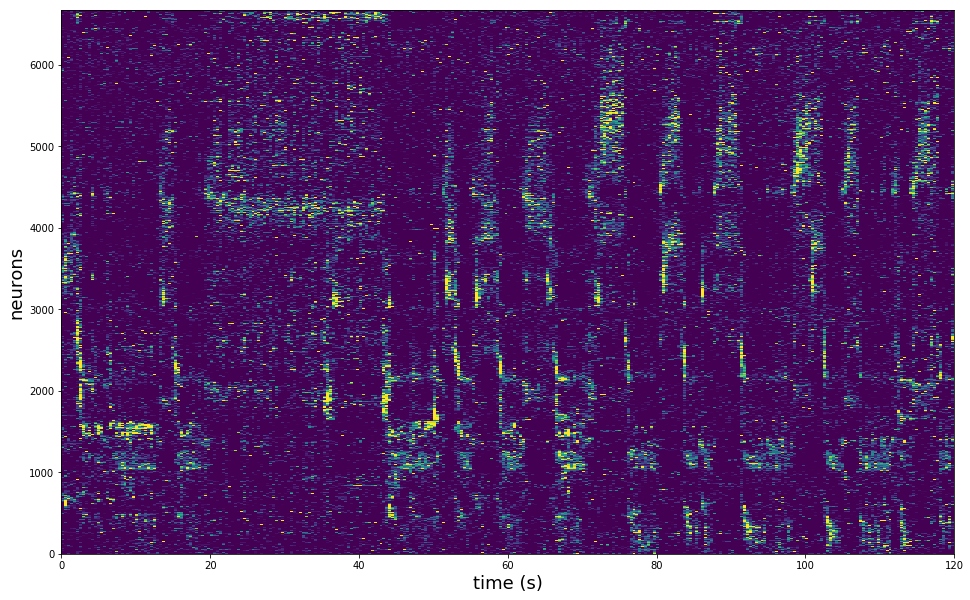

In [68]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,1500:1800]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

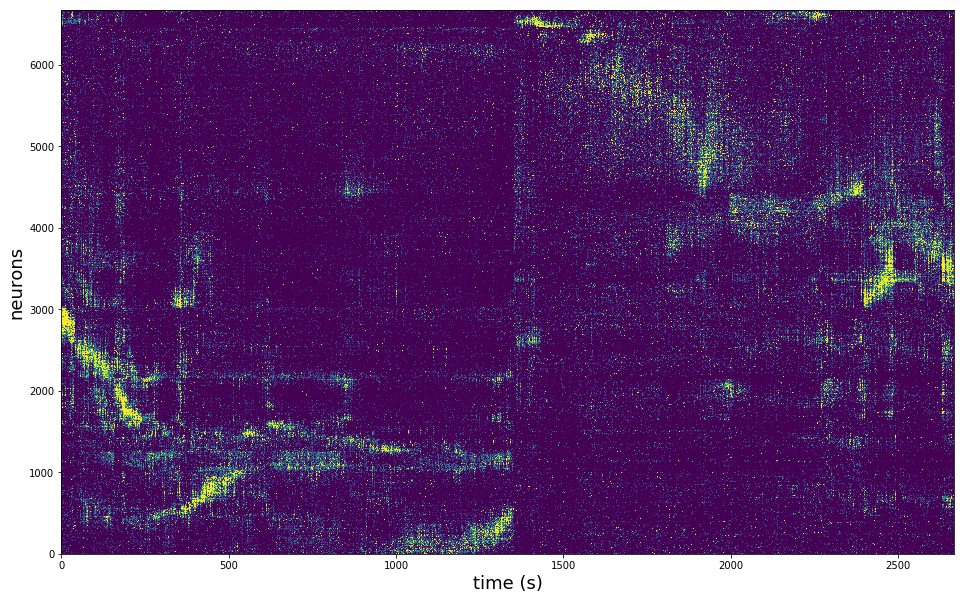

In [67]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,model.isort2]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

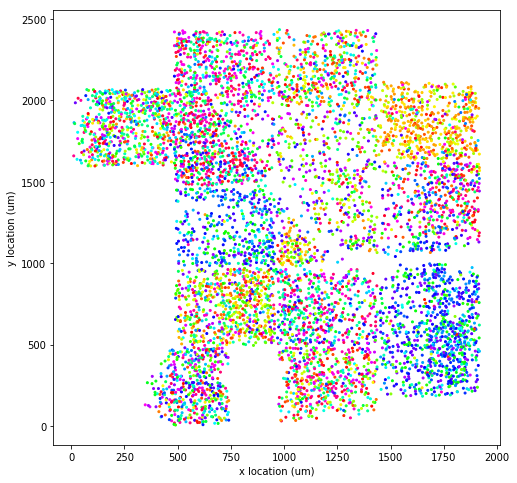

In [8]:
### view positions of cells colored by rastermap

# colormap
cmap = cm.get_cmap('hsv')
cmap = cmap(np.linspace(0.,1,sp.shape[0]))

plt.figure(figsize=(8,8))
# assign color based on embedding
plt.scatter(xyloc[:,0], xyloc[:,1], s=4, color=cmap[isort,:])
plt.xlabel('x location (um)')
plt.ylabel('y location (um)');
plt.show()